In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623237 sha256=0431a7f0030d17fed0e7e25f6c530eb9d00a27591fc234517c5b9c256b6ecb85
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [4]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report

In [5]:
encoding_errors = 'replace'

In [6]:
### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [7]:
df1 = pd.read_csv(r'/content/drive/MyDrive/recommendations system/phone_user_review_file_1.csv', encoding = "ISO-8859-1")
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [8]:
df1.shape

(374910, 11)

In [9]:
df1.size

4124010

In [10]:
df2 = pd.read_csv(r'/content/drive/MyDrive/recommendations system/phone_user_review_file_2.csv', encoding = "ISO-8859-1")
df2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [11]:
df2.shape

(114925, 11)

In [12]:
df2.size

1264175

In [13]:
df3 = pd.read_csv(r'/content/drive/MyDrive/recommendations system/phone_user_review_file_3.csv', encoding = "ISO-8859-1")
df3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [14]:
df3.shape

(312961, 11)

In [15]:
df3.size

3442571

In [16]:
df4 = pd.read_csv(r'/content/drive/MyDrive/recommendations system/phone_user_review_file_4.csv', encoding = "ISO-8859-1")
df4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [17]:
df4.shape

(98284, 11)

In [18]:
df4.size

1081124

In [19]:
df5 = pd.read_csv(r'/content/drive/MyDrive/recommendations system/phone_user_review_file_5.csv', encoding = "ISO-8859-1")
df5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [20]:
df5.shape

(350216, 11)

In [21]:
df5.size

3852376

In [22]:
df6 = pd.read_csv(r'/content/drive/MyDrive/recommendations system/phone_user_review_file_6.csv', encoding = "ISO-8859-1")
df6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [23]:
df6.shape

(163837, 11)

In [24]:
df6.size

1802207

In [25]:
# • Merge the provided CSVs into one data-frame

In [26]:
df = pd.concat([df1,df2,df3,df4,df5,df6],ignore_index = True)
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [27]:
# • Check a few observations and shape of the data-frame

In [28]:
df.shape

(1415133, 11)

In [29]:
df.size

15566463

In [30]:
# • Round off scores to the nearest integers

In [31]:
df['score'] = df['score'].round()

In [32]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [33]:
# • Check for missing values. Impute the missing values if there is any

In [34]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [35]:
df['score'] = df['score'].fillna(df['score'].median())
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [36]:
df7 = df.copy()

In [37]:
del df

In [38]:
### • Drop irrelevant features. Keep features like Author, Product, and Score.

In [39]:
relevant_features=['author','product','score']
irrelvant_features=['phone_url','date','lang','country','source','domain','score_max','extract']

In [40]:
df7 = df7.loc[:,relevant_features]

In [41]:
df7.head()

,author,product,score
0,CarolAnn35,Samsung Galaxy S8,10.0
1,james0923,Samsung Galaxy S8,10.0
2,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",6.0
3,Buster2020,Samsung Galaxy S8 64GB (AT&T),9.0
4,S Ate Mine,Samsung Galaxy S8,4.0


In [42]:
df7.dropna(inplace=True)

In [43]:
df7.shape

(1351931, 3)

In [44]:
### • Check for duplicate values and remove them if there is any

In [45]:
df7 = df7.drop_duplicates()

In [46]:
df7.shape

(1214322, 3)

In [47]:
### • Keep only 1000000 data samples. Use random state=612.

In [48]:
df8 = df7.sample(n=1000000, random_state=612)

In [49]:
df8.shape

(1000000, 3)

In [50]:
### 2. Answer the following questions

In [51]:
### . Identify the most rated features.

In [52]:
df8['product'].value_counts().head()

OnePlus 3 (Graphite, 64 GB)          1828
Lenovo Vibe K4 Note (White,16GB)     1745
Lenovo Vibe K4 Note (Black, 16GB)    1499
Samsung Galaxy J3 (8GB)              1496
Nokia N95                            1480
Name: product, dtype: int64

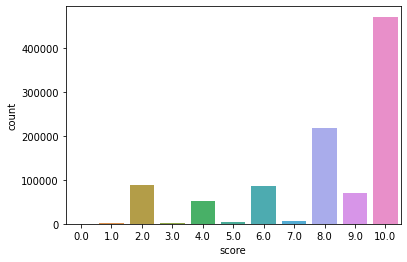

In [53]:
sns.countplot(data=df8 , x='score')
plt.show()

In [54]:
df8[df8['score']==10]['author'].value_counts().head(10)

Amazon Customer    4750
Cliente Amazon     1809
Client d'Amazon     669
Amazon Kunde        576
Anonymous           523
David               424
Alex                357
Daniel              299
Marco               289
Andrea              258
Name: author, dtype: int64

In [55]:
###  Identify the users with most number of reviews.

In [56]:
df8['author'].value_counts().head()

Amazon Customer    13870
Cliente Amazon      5251
Client d'Amazon     2226
Amazon Kunde        1657
Anonymous           1565
Name: author, dtype: int64

In [57]:
### • Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final  dataset.

In [58]:
author50 = df8['author'].value_counts()
author50 = author50[author50>50].index.tolist() # list of authors with > 50 ratings
print('Number of authors who have given >50 rating: ', len(author50))

product50 = df8['product'].value_counts()
product50 = product50[product50>50].index.tolist() # list of products with > 50 ratings
print('Number of products with >50 rating: ', len(product50))

revs_50 = df8[(df8['author'].isin(author50)) & (df8['product'].isin(product50))]
print(f'\nrevs_50: Rows: {revs_50.shape[0]} and Columns: {revs_50.shape[1]}\n')
revs_50.head()

Number of authors who have given >50 rating:  712
Number of products with >50 rating:  4535

revs_50: Rows: 47589 and Columns: 3



,author,product,score
783134,Domenico,"Nokia 208 Telefono Cellulare, Micro SIM, UMTS,...",10.0
407982,Luca,"LG D855 G3 Smartphone, 16 GB, Nero Metallico [...",8.0
875294,Steven,Samsung E1200 Sim Free Mobile Phone - Disconti...,6.0
319163,Amazon Customer,"Huawei Ascend Y550 Smartphone, 4 GB, Nero",10.0
88193,Amazon Customer,"Huawei Nexus 6P unlocked smartphone, 32GB Gold...",4.0


In [59]:
revs_50['author'].unique()[:100]

array(['Domenico', 'Luca', 'Steven', 'Amazon Customer', 'Daniela',
       'Cliente Amazon', 'Tiffany', 'Ð\x95Ð²Ð³ÐµÐ½Ð¸Ñ\x8f', 'John',
       'Christian', 'Jan', 'Tim', 'Ben', 'fabio', 'Aaron', 'Riccardo',
       'Ana', 'Ð\x94Ð°Ñ\x80Ñ\x8cÑ\x8f', 'Pietro', 'Alfredo', 'Peter',
       'anna', "Client d'Amazon", 'francesco', '??????????????', 'Sarah',
       'Luke', 'Denis', 'George', 'Alessandro', 'Massimo', 'Anna',
       'Diego', 'Eduardo', 'Nick', 'Jorge', '????????', 'Amazon Kunde',
       'Barbara', 'Leonardo', 'Andrew', 'Michael', 'Sandra', 'Markus',
       'Stephen', 'Ð\x90Ñ\x80Ñ\x82ÐµÐ¼', 'Giorgio', 'Anonymous',
       'Kindle Customer', 'Julian', 'Cristian', 'Kevin', 'bob', 'mark',
       'Angelo', 'Alex', 'Francesco', '?????????????????\x80', 'andrea',
       'juan', 'Andrea', 'victor', 'Manuel', 'Chris', 'gabberino93',
       'Lukas', 'Anthony', 'Stefano', 'Felix', 'Karen', 'JJ', 'Robert',
       'Ð\x98Ñ\x80Ð¸Ð½Ð°', 'Adrian', 'Simone', 'Kindle-Kunde', 'antonio',
       'Julio',

In [60]:
revs_50['product'].unique()[:100]

array(['Nokia 208 Telefono Cellulare, Micro SIM, UMTS, Bluetooth, Nero',
       'LG D855 G3 Smartphone, 16 GB, Nero Metallico [Italia]',
       'Samsung E1200 Sim Free Mobile Phone - Discontinued by manufacturer',
       'Huawei Ascend Y550 Smartphone, 4 GB, Nero',
       'Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty)',
       'Samsung Star S5230 Smartphone (Touchscreen, 3MP Kamera, Video, MP3-Player, Bluetooth) black gold',
       'LG G3 - Smartphone libre Android (pantalla 5.5", cÃ¡mara 13 Mp, 16 GB, Quad-Core 2.5 GHz, 2 GB RAM), dorado',
       'Samsung Factory Unlocked Samsung Galaxy Mega 6.3 I9205 LTE White Phone',
       'Samsung G920 Galaxy S6 Smartphone, 32 GB, Oro [Italia]',
       'Samsung S7270 Galaxy Ace 3 (Ð±ÐµÐ»Ñ\x8bÐ¹)',
       'LG Quantum C900 Unlocked Phone with Windows 7, QWERTY Keyboard and 5 MP Camera - Unlocked Phone - US Warranty - Black',
       'Vodafone Smart Ultra 6 Pay As You Go Android Smartphone - Black',
       'Samsung Galaxy S6 Edge G925F 

In [61]:
### 3. Build a popularity based model and recommend top 5 mobile phones.

In [62]:
def popularity_rec(data):
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

In [63]:
popularity_rec(revs_50)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,26
Sim Free Apple iPhone SE 16GB Mobile Phone - Rose Gold.,10.0,12
Huawei Ascend P7,10.0,8
"Huawei Mate 7 - Smartphone libre Android (pantalla 6"", cÃ¡mara 13 Mp, 16 GB, Quad-Core 1.8 GHz, 2 GB RAM), blanco",10.0,8
"Microsoft Lumia 640 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) blau",10.0,8


In [64]:
### 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model

In [65]:
from surprise import Dataset, Reader

In [66]:
reader = Reader(rating_scale = (0,2))
data = Dataset.load_from_df(revs_50[['author','product','score']],reader)
data

In [67]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size =0.25, random_state = 1)

In [68]:
from surprise import SVD

svd_model = SVD(random_state = 1)
svd_model.fit(trainset)

In [69]:
train_pred = svd_model.test(trainset.build_testset())
test_pred = svd_model.test(testset)

In [70]:
svd_pred_data = pd.DataFrame(test_pred)
svd_pred_data.head()

,uid,iid,r_ui,est,details
0,Amazon Customer,Apple iPhone 4S 32GB Black - Unlocked,8.0,2.0,{'was_impossible': False}
1,ÐÐ½Ð½Ð°,Sony Xperia Z (ÑÐµÑÐ½ÑÐ¹),8.0,2.0,{'was_impossible': False}
2,matteo,BlackBerry 8800,9.0,2.0,{'was_impossible': False}
3,fabio,Smartphone LG L90 Dual D410 Branco com Tela de...,8.0,2.0,{'was_impossible': False}
4,Daniela,"Apple Smartphone iPhone 4s, Nero [Italia]",10.0,2.0,{'was_impossible': False}


In [71]:
from surprise import KNNWithMeans

In [72]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [73]:
i_test_pred = algo.test(testset)

In [74]:
i_test_pred

[Prediction(uid='Amazon Customer', iid='Apple iPhone 4S 32GB Black - Unlocked', r_ui=8.0, est=2, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Ð\x90Ð½Ð½Ð°', iid='Sony Xperia Z (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', r_ui=8.0, est=2, details={'actual_k': 28, 'was_impossible': False}),
 Prediction(uid='matteo', iid='BlackBerry 8800', r_ui=9.0, est=2, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='fabio', iid='Smartphone LG L90 Dual D410 Branco com Tela de 4.7â\x80\x9d, Dual Chip, Android 4.4, CÃ¢mera 8MP e Processador Quad Core de 1.2 GHz', r_ui=8.0, est=2, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='Daniela', iid='Apple Smartphone iPhone 4s, Nero [Italia]', r_ui=10.0, est=2, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Marrone', r_ui=2.0, est=2, details={'actual_k': 50

In [75]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 6.4657


6.465696170667284

In [76]:
algo1 = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo1.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [77]:
u_test_pred = algo1.test(testset)

In [78]:
u_test_pred

[Prediction(uid='Amazon Customer', iid='Apple iPhone 4S 32GB Black - Unlocked', r_ui=8.0, est=2, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='Ð\x90Ð½Ð½Ð°', iid='Sony Xperia Z (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', r_ui=8.0, est=2, details={'actual_k': 38, 'was_impossible': False}),
 Prediction(uid='matteo', iid='BlackBerry 8800', r_ui=9.0, est=2, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='fabio', iid='Smartphone LG L90 Dual D410 Branco com Tela de 4.7â\x80\x9d, Dual Chip, Android 4.4, CÃ¢mera 8MP e Processador Quad Core de 1.2 GHz', r_ui=8.0, est=2, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='Daniela', iid='Apple Smartphone iPhone 4s, Nero [Italia]', r_ui=10.0, est=2, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Marrone', r_ui=2.0, est=2, details={'actual_k': 13,

In [79]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 6.4657


6.465696170667284

In [80]:
### 5. Evaluate the collaborative model. Print RMSE value.

In [81]:
print("Train RMSE:", accuracy.rmse(train_pred))
print("Test RMSE:", accuracy.rmse(test_pred))

RMSE: 6.4620
Train RMSE: 6.462034973366761
RMSE: 6.4657
Test RMSE: 6.465696170667284


In [82]:
### 6. Predict score (average rating) for test users.

In [83]:
svd_pred_data=pd.DataFrame(svd_pred_data, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [84]:
print('average rating  by test users: ',svd_pred_data['rui'].mean())


average rating  by test users:  nan


In [85]:
i_test_pred=pd.DataFrame(i_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [86]:
print('average rating  by test users: ',i_test_pred['rui'].mean())

average rating  by test users:  7.893007228105564


In [87]:
u_test_pred=pd.DataFrame(u_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average rating  by test users: ',u_test_pred['rui'].mean())

average rating  by test users:  7.893007228105564


In [88]:
### 7. Report your findings and inferences.

In [89]:
### Samsung Galaxy Note5 is the highly rated phone
### Most of the authors have given the rating of '10' or '8'
### The RMSE for both item based and user based KNNwithmeans are similar.

In [90]:
### 8. Try and recommend top 5 products for test users.

In [93]:
#  Function to return number of items rated by given user 

def get_Iu(uid):
       # uid: the id of the user
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
   #    return the number of items rated by the user

    
# Function to return number of users that have rated given item

def get_Ui(iid):
    #  iid: the raw id of the item
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    #   return the number of users that have rated the item.
    
 # Getting Top Predictions based upon Error between Actual and predicted   
revs_50 = pd.DataFrame(svd_pred_data, columns=['uid', 'iid', 'rui', 'est', 'details'])
revs_50['Iu'] = revs_50.uid.apply(get_Iu)
revs_50['Ui'] = revs_50.iid.apply(get_Ui)
revs_50['err'] = abs(revs_50.est - revs_50.rui)
best_predictions = revs_50.sort_values(by='err')[:5]


In [94]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,Amazon Customer,Apple iPhone 4S 32GB Black - Unlocked,NaN,2.0,{'was_impossible': False},3630,3,NaN
1,ÐÐ½Ð½Ð°,Sony Xperia Z (ÑÐµÑÐ½ÑÐ¹),NaN,2.0,{'was_impossible': False},63,82,NaN
2,matteo,BlackBerry 8800,NaN,2.0,{'was_impossible': False},32,0,NaN
3,fabio,Smartphone LG L90 Dual D410 Branco com Tela de...,NaN,2.0,{'was_impossible': False},57,11,NaN
4,Daniela,"Apple Smartphone iPhone 4s, Nero [Italia]",NaN,2.0,{'was_impossible': False},33,13,NaN


In [95]:
### 9. Try cross validation techniques to get better results.

In [99]:
from surprise.model_selection import cross_validate, train_test_split

In [100]:
# Applying SVD and KNN with Means with 20 means algorithm to recommend
# Applying k-fold cross validation with 5 folds to achieve better performance
 
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(k=20)]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,6.463032,2.300525,0.142567
KNNWithMeans,6.463850,0.070725,0.457462


In [101]:
### 10. In what business scenario you should use popularity based Recommendation Systems ?

In [ ]:
# when the user is new to the site

In [102]:
### 11. In what business scenario you should use CF based Recommendation Systems ?

In [ ]:
# When the data is huge we can use both user and item base CF.

In [103]:
### 12. What other possible methods can you think of which can further improve the recommendation for different users ?

In [ ]:
# Hybrid approach